# Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# import dataset used here
from sklearn import datasets

In [2]:
os.getcwd()

'/private/var/mobile/Containers/Data/Application/BB0AD78C-B43B-4456-9BFF-0D803A285C6D/Documents'

# EDA - Exploratory Data Analysis


In [3]:
# args: diabets dataset from python
# output: 
#     - df (dataframe): original dataset \n
#     - df1 (dataframe): df with colum names transformed

In [4]:
print(datasets.load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
df = pd.DataFrame(datasets.load_iris()['data'])

In [6]:
df.columns = datasets.load_iris()['feature_names']

In [7]:
df['target'] = list(datasets.load_iris()['target'])

In [8]:
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [10]:
df1 = df.copy()

In [11]:
df1.columns = ["sepal_len","sepal_wid","petal_len","petal_wid","target"]

In [12]:
import seaborn as sns

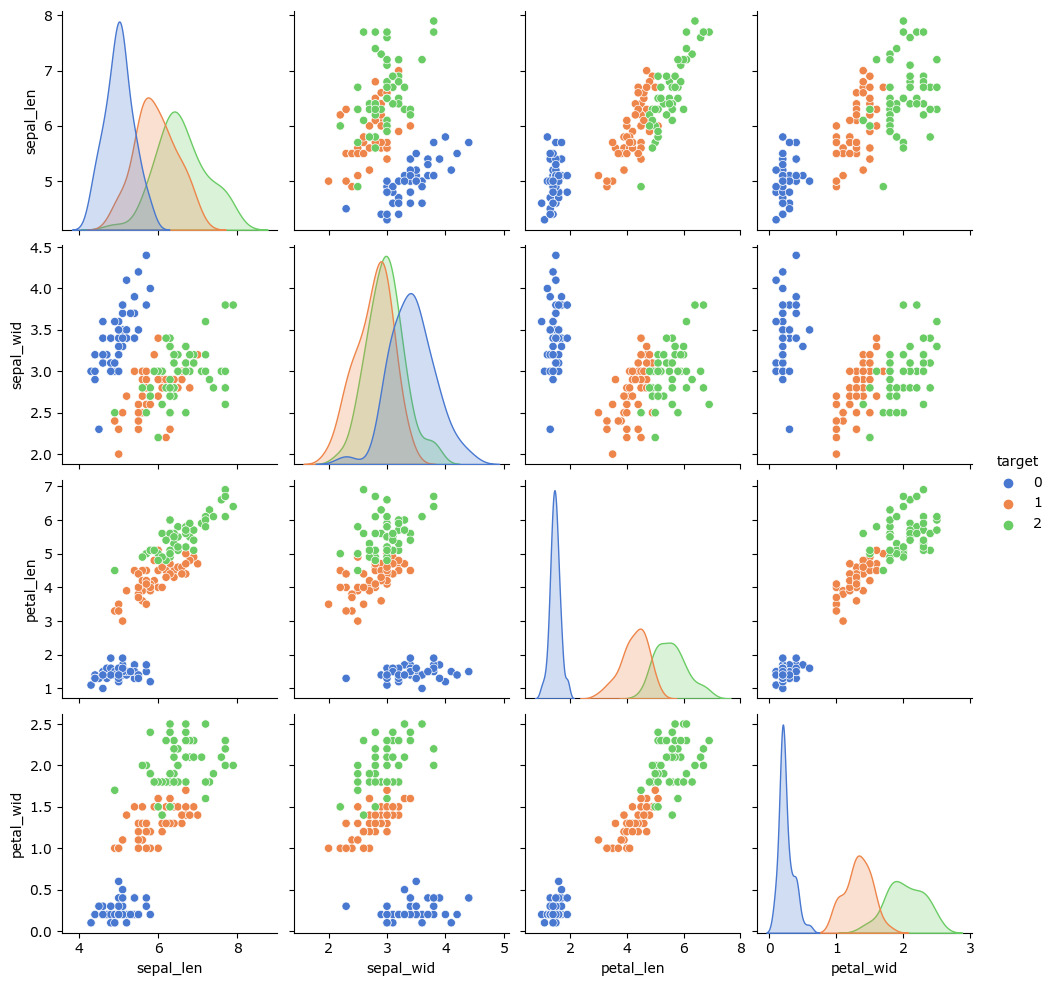

In [13]:
sns.pairplot(df1,kind='scatter',diag_kind='kde',hue='target',palette='muted')

In [38]:
df1.describe()

,sepal_len,sepal_wid,petal_len,petal_wid,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [45]:
df1["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

# Encoding

In [15]:
# args:
#     - df1 (dataframe): df with colum names transformed
# output:
#     - x (dataframe): dataset with preditors variables before scale 
#     - x_transformed (dataframe): dataset with preditors variables scaled 
#     - y (list): target values

In [16]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [17]:
df1.columns

Index(['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'target'], dtype='object')

In [18]:
y = df1["target"]
var_preditors = [x for x in df1.columns if x != "target"]
x = df1[var_preditors]

In [19]:
column_transformer = make_column_transformer(
    (StandardScaler(),
    ['sepal_len','sepal_wid','petal_len','petal_wid']),
    remainder="passthrough")

In [20]:
x_transformed = column_transformer.fit_transform(x)
print(x_transformed.shape)

(150, 4)


# Split dataset

In [21]:
# args:
#     - x (dataframe): dataset with preditors variables before scale 
#     - x_transformed (dataframe): dataset with preditors variables scaled 
#     - y (list): target values
# output:
#     - x_train (dataframe): 
#     - x_test (dataframe):  
#     - y_train (dataframe): 
#     - y_test (dataframe):

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.40, random_state=42)

# Feature Selection

## Boruta

In [24]:
column_names = column_transformer.get_feature_names_out()
df_encoding = pd.DataFrame({'variavel_categoria':column_names})
print(df_encoding.shape)

(4, 1)


In [25]:
%pip install boruta

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from boruta import BorutaPy

In [27]:
forest = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, random_state = 42)
forest.fit(x_train, y_train)

"""
define Boruta feature selection method
"""
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

x = x_test
y = y_test

"""
find all relevant features
"""
feat_selector.fit(x, y)

"""
call transform() on X to filter it down to selected features
"""
X_filtered = feat_selector.transform(x)

"""
zip my names, ranks, and decisions in a single iterable
"""
feature_ranks = list(zip(column_names, 
                            feat_selector.ranking_, 
                            feat_selector.support_))

feat_sel = pd.DataFrame({'var':column_names,'rank':feat_selector.ranking_,'support':feat_selector.support_})    
var_select = list(feat_sel[feat_sel['support']==True]['var'])

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	1
Iteration: 	17 / 

In [28]:
var_select

['standardscaler__petal_len', 'standardscaler__petal_wid']

## LASSO

In [29]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [30]:
sel_ = SelectFromModel(LogisticRegression())

In [31]:
sel_.fit(x_train,y_train)

SelectFromModel(estimator=LogisticRegression())

In [32]:
list(sel_.get_support())

[False, False, True, True]

In [33]:
# removed
[x for x,y in zip(df.columns,sel_.get_support()) if y==0]

['sepal length (cm)', 'sepal width (cm)']

In [34]:
# select
[x for x,y in zip(df.columns,sel_.get_support()) if y==1]

['petal length (cm)', 'petal width (cm)']

# Run models

## Gradient Boosting

## XGBoosting (squared error)

## XGBoosting (poisson)

# Check metrics